### **Import Necessary Dependencies**


In [512]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

### **Import Data and Overview**

In [513]:
df = pd.read_csv(r"data/Streaming.csv")
df.head()

,Customer_ID,Age,Gender,Subscription_Length,Region,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
0,CUST000001,56.0,Male,54,South,PayPal,0,9.0,6.42,319,62.11,1
1,CUST000002,69.0,Female,21,East,Debit Card,1,2.0,13.77,166,37.27,1
2,CUST000003,46.0,Female,49,East,PayPal,3,8.0,19.91,207,61.82,0
3,CUST000004,32.0,Male,47,West,Debit Card,3,1.0,13.39,108,40.96,1
4,CUST000005,60.0,Male,6,East,Credit Card,2,NaN,13.18,65,45.97,0


In [514]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer_ID             5000 non-null   object 
 1   Age                     4500 non-null   float64
 2   Gender                  5000 non-null   object 
 3   Subscription_Length     5000 non-null   int64  
 4   Region                  5000 non-null   object 
 5   Payment_Method          5000 non-null   object 
 6   Support_Tickets_Raised  5000 non-null   int64  
 7   Satisfaction_Score      4500 non-null   float64
 8   Discount_Offered        5000 non-null   float64
 9   Last_Activity           5000 non-null   int64  
 10  Monthly_Spend           5000 non-null   float64
 11  Churned                 5000 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 468.9+ KB


### **Exploratory Data Analysis**


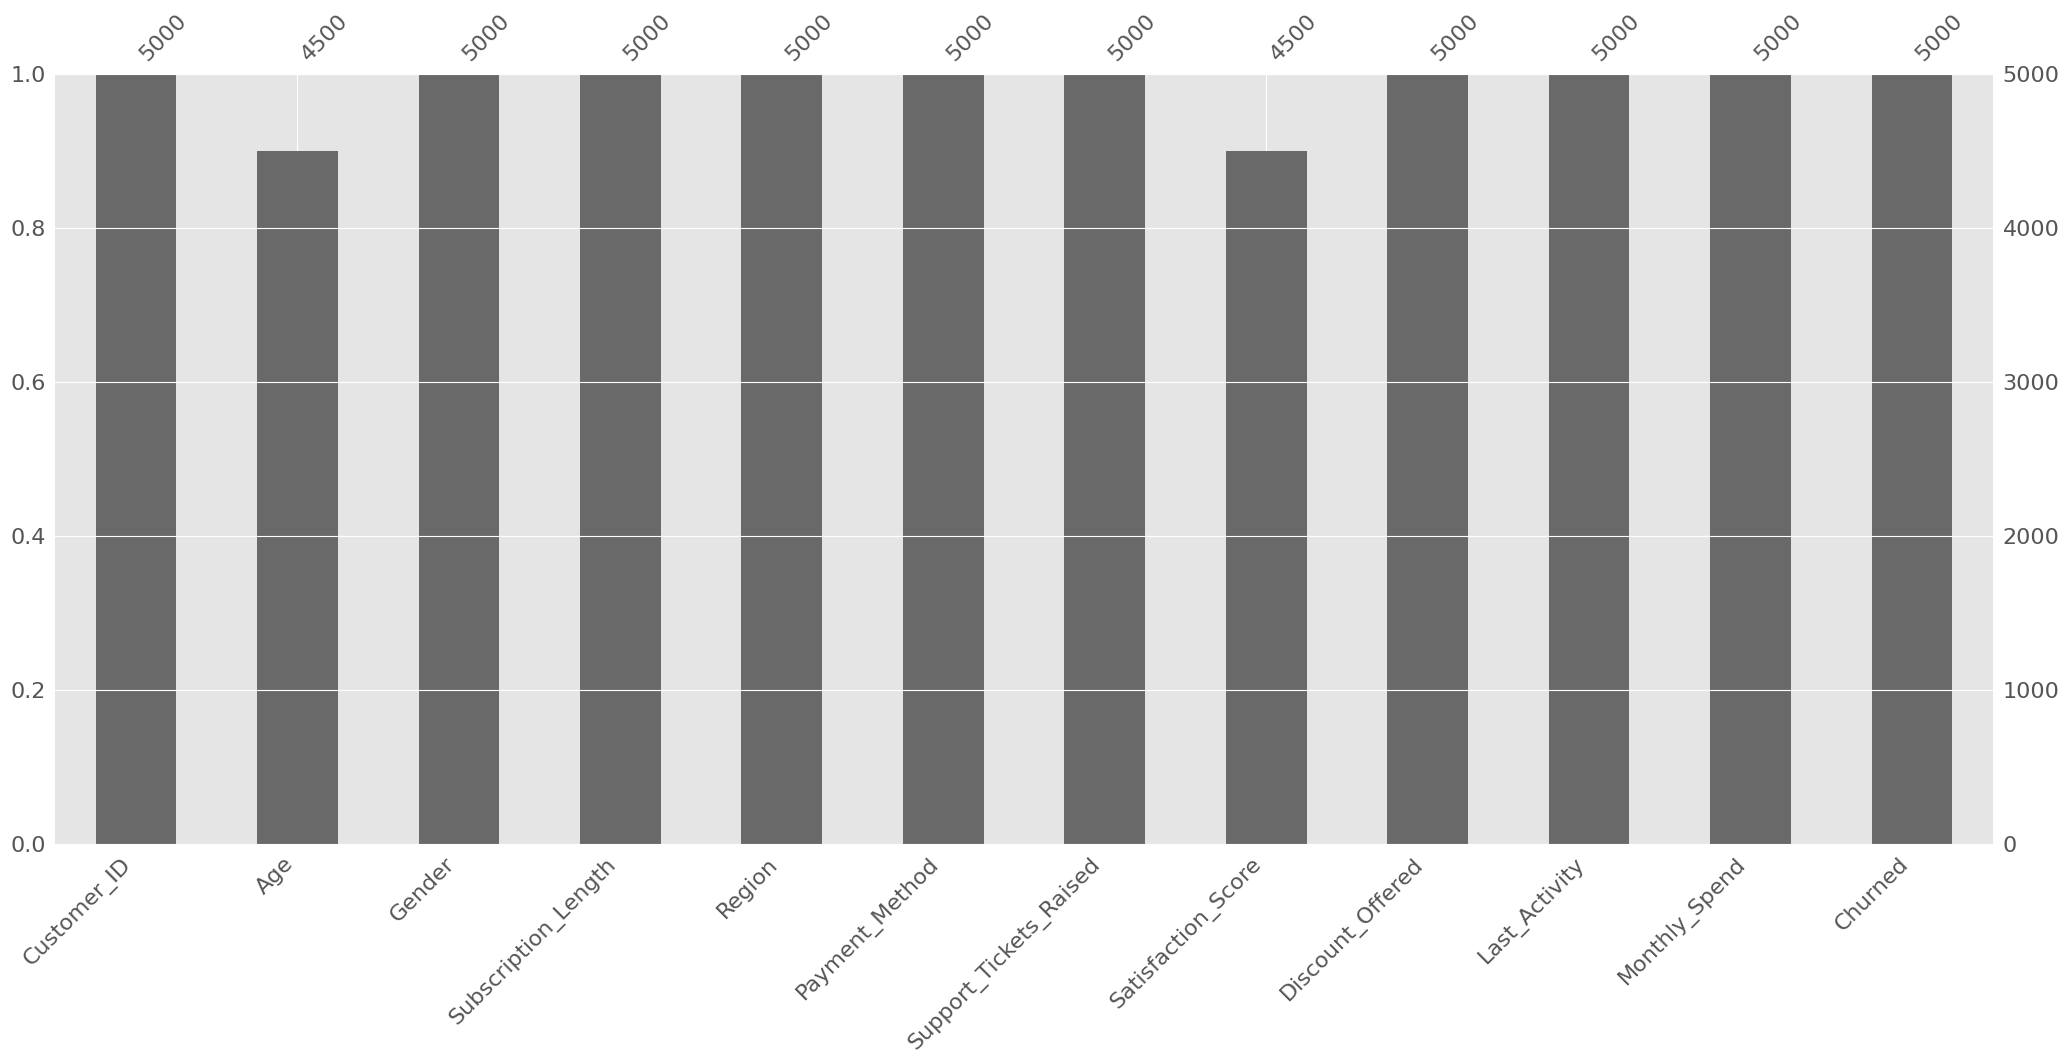

In [515]:
msno.bar(df);

In [ ]:
# Missing values
df.isna().sum()

Customer_ID                 0
Age                       500
Gender                      0
Subscription_Length         0
Region                      0
Payment_Method              0
Support_Tickets_Raised      0
Satisfaction_Score        500
Discount_Offered            0
Last_Activity               0
Monthly_Spend               0
Churned                     0
dtype: int64

In [ ]:
# Duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Desciptive statistics(Numerical)
df.describe()

,Age,Subscription_Length,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
count,4500.000000,5000.000000,5000.000000,4500.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.582222,29.704400,2.037000,5.54600,12.458404,181.441400,46.619784,0.448000
std,14.969559,17.050336,1.422405,2.86929,4.325381,104.500951,9.522140,0.497338
min,18.000000,1.000000,0.000000,1.00000,5.000000,1.000000,-5.060000,0.000000
25%,31.000000,15.000000,1.000000,3.00000,8.700000,90.000000,39.897500,0.000000
50%,43.000000,29.000000,2.000000,6.00000,12.500000,182.000000,46.625000,0.000000
75%,56.000000,44.000000,3.000000,8.00000,16.190000,271.000000,53.210000,1.000000
max,69.000000,59.000000,9.000000,10.00000,20.000000,364.000000,137.310000,1.000000


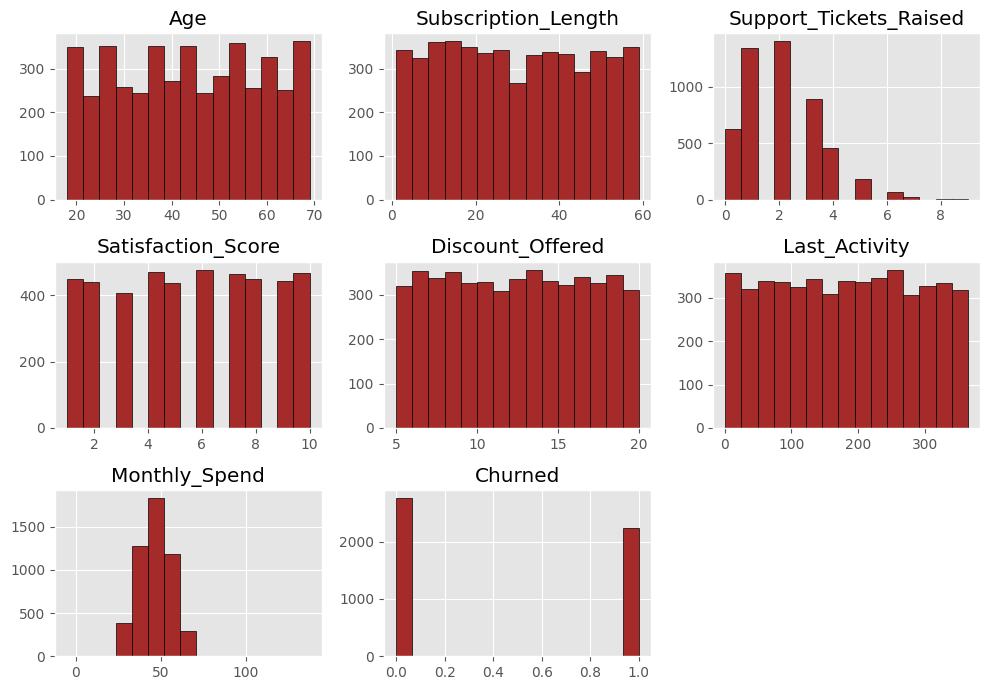

In [519]:
# Data Distribution (Histogram)
df.hist(figsize=(10,7), bins=15, color= 'brown', edgecolor= 'black')
plt.tight_layout();

In [520]:
df.select_dtypes('number').skew()

Age                      -0.006680
Subscription_Length       0.040511
Support_Tickets_Raised    0.743782
Satisfaction_Score       -0.025889
Discount_Offered          0.008421
Last_Activity            -0.000843
Monthly_Spend             0.202941
Churned                   0.209197
dtype: float64

> **Outliers**

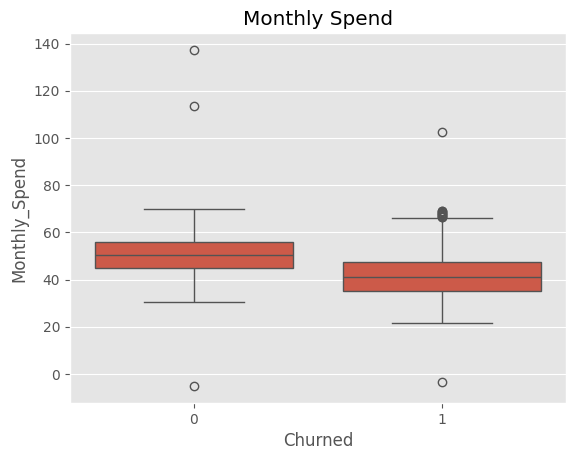

In [ ]:
fig, ax = plt.subplots()

sns.boxplot(x = df['Churned'], y= df['Monthly_Spend'], ax=ax)
plt.title('Monthly Spend');

> **Correlation**

<Axes: >

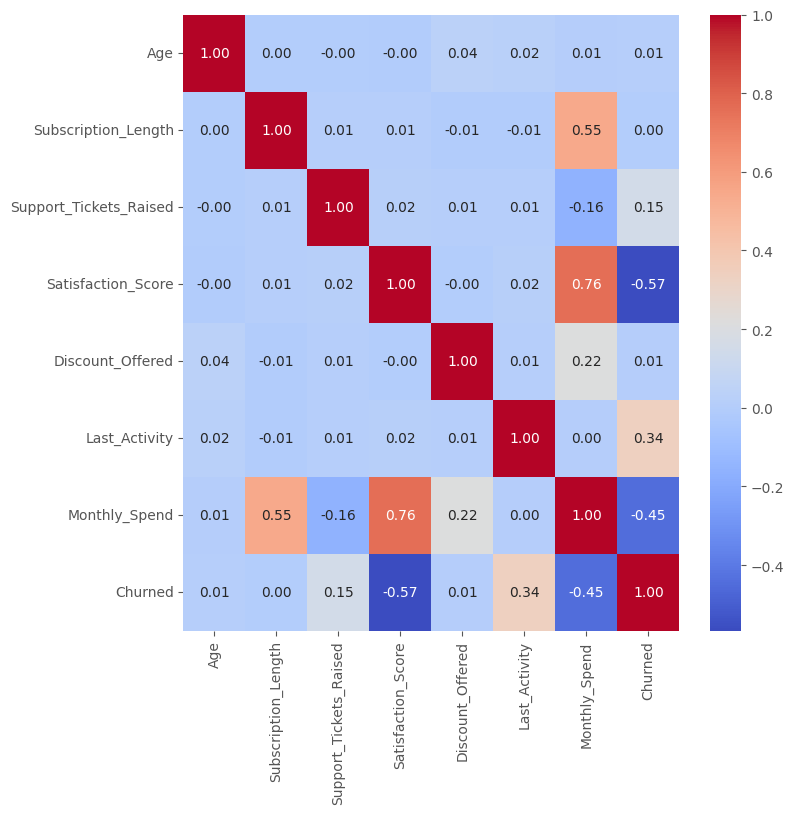

In [ ]:
corr = df.select_dtypes('number').corr()
# Visualize 
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

> **Class Balance**

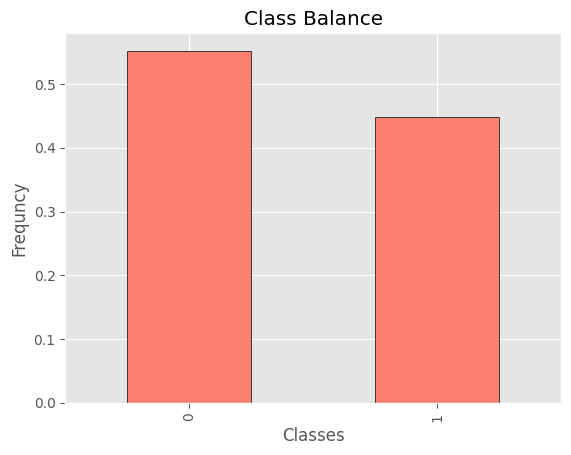

In [523]:
df['Churned'].value_counts(normalize=True).plot(
    kind='bar',
    xlabel='Classes',
    ylabel='Frequncy',
    title='Class Balance',
    color='salmon',
    edgecolor= 'black'
);

In [524]:
# Descriptive Statistics(Categorical Data)
df.describe(include='O')

,Customer_ID,Gender,Region,Payment_Method
count,5000,5000,5000,5000
unique,5000,2,4,3
top,CUST000001,Female,West,Debit Card
freq,1,2514,1316,1697


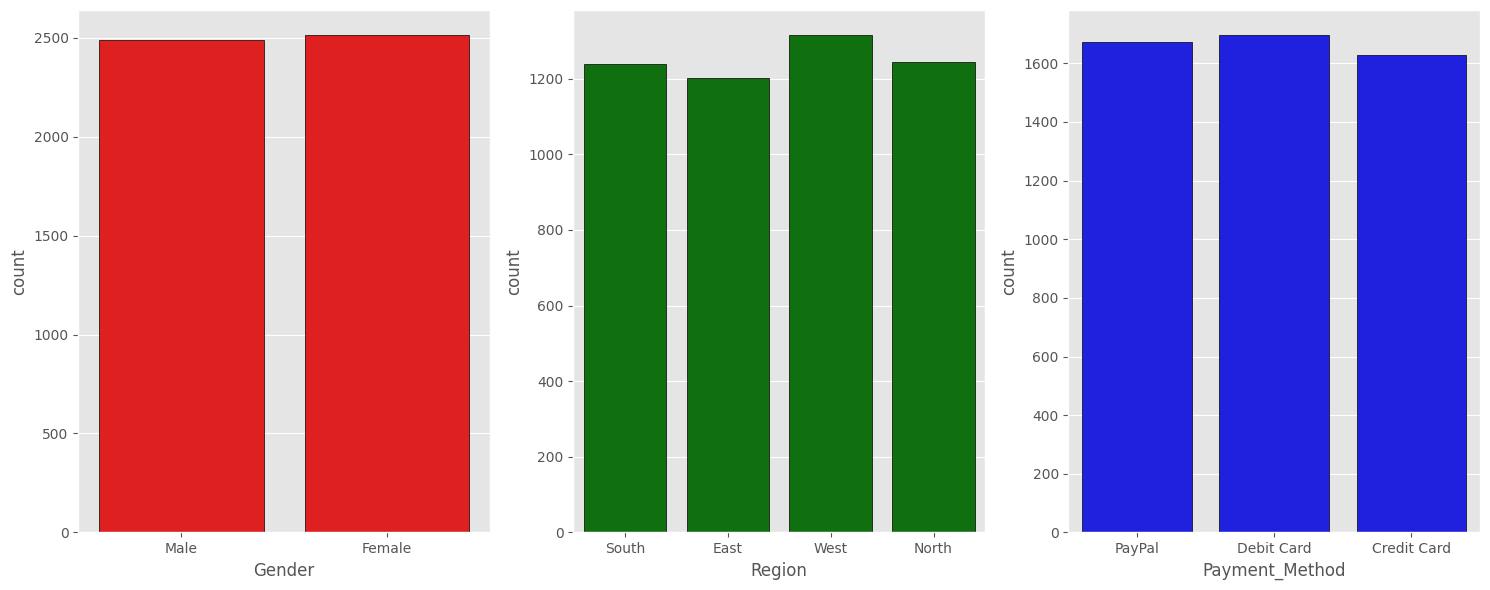

In [525]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.countplot(data= df, x='Gender', color='r', edgecolor= 'black')

plt.subplot(1,3,2)
sns.countplot(data= df, x='Region', color='g', edgecolor= 'black')

plt.subplot(1,3,3)
sns.countplot(data= df, x='Payment_Method', color='b', edgecolor= 'black')

plt.tight_layout()

### **Data Cleaning**

> **Missing Data**

In [526]:
# Missing Data
cols = ['Age', 'Satisfaction_Score']

for col in cols:
    df[col] = df[col].fillna(np.mean(df[col]).round(1))

df.isna().sum()

Customer_ID               0
Age                       0
Gender                    0
Subscription_Length       0
Region                    0
Payment_Method            0
Support_Tickets_Raised    0
Satisfaction_Score        0
Discount_Offered          0
Last_Activity             0
Monthly_Spend             0
Churned                   0
dtype: int64

> **Multi-collinearity**

In [527]:
multicol_cols = ['Monthly_Spend', 'Satisfaction_Score']
for col in multicol_cols:
    score = df[col].corr(df['Churned'])

    print(f'{col}: {score:.3f}')

Monthly_Spend: -0.447
Satisfaction_Score: -0.537


In [528]:
mth_spend = df['Monthly_Spend'].corr(df['Churned'])
satisfaction_score = df['Satisfaction_Score'].corr(df['Churned'])

# Drop the more correlated feature
if mth_spend < satisfaction_score:
    df.drop(columns='Satisfaction_Score', inplace=True)
    print('Satisfaction Score Dropped')
else:
    df.drop(columns='Monthly_Spend', inplace=True)
    print('Monthly Spend Dropped')

Monthly Spend Dropped


> **Drop High Cardinality Column**

In [529]:
df.drop(columns='Customer_ID', inplace=True)
df.head()

,Age,Gender,Subscription_Length,Region,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Churned
0,56.0,Male,54,South,PayPal,0,9.0,6.42,319,1
1,69.0,Female,21,East,Debit Card,1,2.0,13.77,166,1
2,46.0,Female,49,East,PayPal,3,8.0,19.91,207,0
3,32.0,Male,47,West,Debit Card,3,1.0,13.39,108,1
4,60.0,Male,6,East,Credit Card,2,5.5,13.18,65,0


### **Data Preprocessing**

> **Split Data into Training and Testing Split**

In [530]:
X = df.drop('Churned', axis=1)
y = df.Churned

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'X train: {len(X_train)}')
print(f'X test: {len(X_test)}')
print(f'y train: {len(y_train)}')
print(f'y test: {len(y_test)}')

X train: 3500
X test: 1500
y train: 3500
y test: 1500


> **Preprocessing Pipeline**

In [532]:
preprocess = ColumnTransformer(
    transformers=[
        ('Categories', OneHotEncoder(drop='first', sparse_output=False), X.select_dtypes('O').columns.tolist()),
        ('Numerical', StandardScaler(), X.select_dtypes('number').columns.tolist())
    ], remainder='drop'
)

### **Model**

> **Model Pipeline**

In [533]:
model = Pipeline(
    steps=[
        ('Preprocess', preprocess),
        ('Model', LogisticRegression(random_state=42))
    ]
)

In [534]:
# Fit model
model.fit(X_train, y_train)

Pipeline(steps=[('Preprocess',
                 ColumnTransformer(transformers=[('Categories',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender', 'Region',
                                                   'Payment_Method']),
                                                 ('Numerical', StandardScaler(),
                                                  ['Age', 'Subscription_Length',
                                                   'Support_Tickets_Raised',
                                                   'Satisfaction_Score',
                                                   'Discount_Offered',
                                                   'Last_Activity'])])),
                ('Model', LogisticRegression(random_state=42))])

> **Prediction & Evaluation**

In [535]:
# Make Predictions on the test data
ypred = model.predict(X_test)

# Evaluate Model
class_report = classification_report(y_test, ypred)

print(class_report)

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       811
           1       0.80      0.78      0.79       689

    accuracy                           0.81      1500
   macro avg       0.81      0.80      0.80      1500
weighted avg       0.81      0.81      0.81      1500



> **Confusion Matrix**

Text(0.5, 1.0, 'Confusion Matrix')

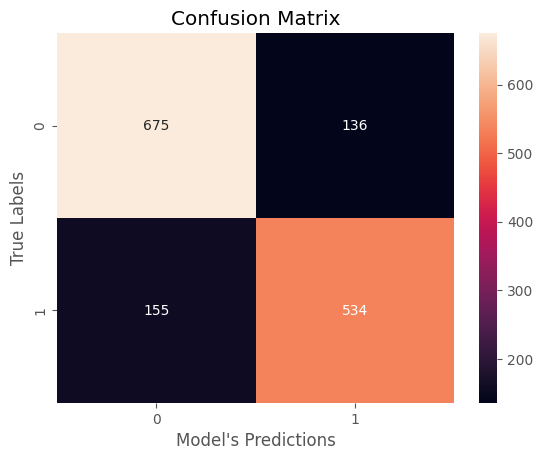

In [536]:
conf_matrix = confusion_matrix(y_test, ypred)
# Visualize
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Model\'s Predictions')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')


> **Feature Importances**

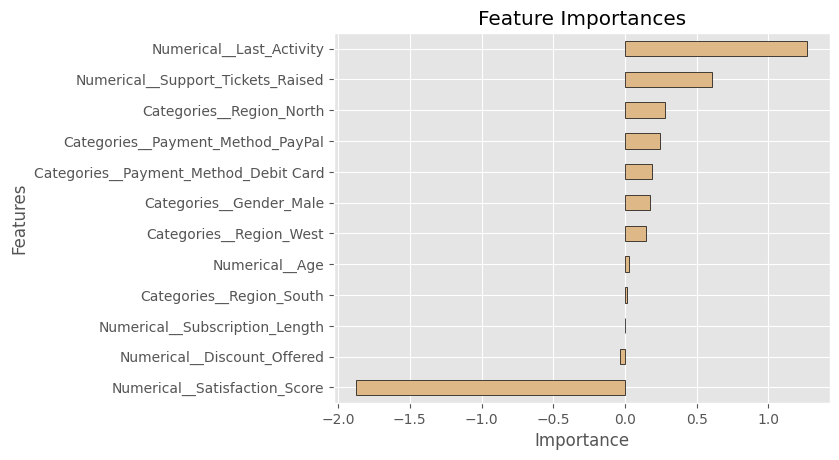

In [ ]:
# Get feature names after preprocessing
feature_names = model.named_steps['Preprocess'].get_feature_names_out()
# Access the Model
logreg = model.named_steps['Model']
# Get the Feature Coefficient
importances = logreg.coef_[0]
# Combine the features and the coefficients
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=True)
# Visualize
feature_importances.plot(
    kind='barh',
    color='burlywood',
    edgecolor= 'black',
    xlabel = 'Importance',
    ylabel= 'Features',
    title= 'Feature Importances'
);